In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset
houses = pd.read_csv(r"C:\Users\Rajashri\Desktop\Resume\Resume Projects\Housing Prices Predictions\website\Bengaluru_House_Data.csv")

In [3]:
print(houses.shape)
houses.head(5)

(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
houses.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


### Data cleaning

In [6]:
houses.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
# 'society' contains a lot of missing values, let's drop this column
houses = houses.drop('society', axis='columns')

print(houses.shape)
houses.head(5) 

(13320, 8)


,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
# There is only 1 missing value in 'location', so fill it with the highest one
houses['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [9]:
houses['location'] = houses['location'].fillna('Whitefield')

In [10]:
# There are 16 missing values in 'size', so fill it with the highest one
houses['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [11]:
houses['size'] = houses['size'].fillna('2 BHK')

In [12]:
# There are 73 missing values in 'bath', so fill it with the mean value
houses['bath'] = houses['bath'].fillna(houses['bath'].mean())

In [13]:
# There are 609 missing values in 'balcony', so fill it with the mean value
houses['balcony'] = houses['balcony'].fillna(houses['balcony'].mean())

In [14]:
# Let's check if any more null values present
houses.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

### Feature Engineering

In [15]:
houses['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
# Create a new integer column based on the 'size' column
# We will first split the string using 'space', out of which we will consider the 1st token
houses['size'] = houses['size'].apply(lambda x: x.split(' ')[0])
houses['bhk'] = houses['size'].astype(int)

In [17]:
houses['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [18]:
# Drop the 'size' column now
houses = houses.drop('size', axis='columns')

print(houses.shape)
houses.head(5)

(13320, 8)


,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2


In [19]:
# There are 'outliers' present in our data
houses[houses.bhk > 20]

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Plot Area,Ready To Move,Munnekollal,2400,40.0,0.0,660.0,43


In [20]:
# Explore 'total_sqft' feature now
houses['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

# Let's look at the rows where 'total_sqft' is not a float value
houses[~houses['total_sqft'].apply(is_float)].head(10)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,2100 - 2850,4.00000,0.000000,186.000,4
56,Built-up Area,20-Feb,Devanahalli,3010 - 3410,2.69261,1.584376,192.000,4
81,Built-up Area,18-Oct,Hennur Road,2957 - 3450,2.69261,1.584376,224.500,4
122,Super built-up Area,18-Mar,Hebbal,3067 - 8156,4.00000,0.000000,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,1042 - 1105,2.00000,0.000000,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,1145 - 1340,2.00000,0.000000,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,1015 - 1540,2.00000,0.000000,56.800,2
224,Super built-up Area,19-Dec,Devanahalli,1520 - 1740,2.69261,1.584376,74.820,3
410,Super built-up Area,Ready To Move,Kengeri,34.46Sq. Meter,1.00000,0.000000,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,1195 - 1440,2.00000,0.000000,63.770,2


In [22]:
# Clearly, we have both range '2100 - 2850' and string '34.46Sq. Meter' values
# So, we will convert the range into integers, and we will ignore the string values

In [23]:
# To convert the ranges present into a single value, we will split using the range using '-' and take the average
def convertRange(x):
    temp = x.split('-')
    if(len(temp) == 2):
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None
    
houses['total_sqft'] = houses['total_sqft'].apply(convertRange)

In [24]:
convertRange('2100 - 2850')

2475.0

In [25]:
convertRange('34.46Sq. Meter')

In [26]:
print(houses['total_sqft'].max())
print(houses['total_sqft'].min())

52272.0
1.0


In [27]:
houses.head(5)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2


In [28]:
# Add new column called 'price per square feet'
# 'price' column is given in 'lakhs' here
houses['price_per_sqft'] = houses['price']*100000 / houses['total_sqft']

In [29]:
houses.head(5)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [30]:
# Explore the 'location' column
houses['location'].value_counts()

Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [31]:
# We have 1305 values in 'location', which will be difficult to encode later
# So, we will have to reduce, i.e., dimensionality reduction
# First, we will remove white spaces
houses['location'] = houses['location'].apply(lambda x: x.strip())

In [32]:
loc_count = houses['location'].value_counts()

# We will replace less-occurring locations with 'other'
less_loc_count = loc_count[loc_count <= 10]
print(len(less_loc_count))
less_loc_count

1053


Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1053, dtype: int64

In [33]:
# There are 1053 such locations which we will replace with 'other' now
houses['location'] = houses['location'].apply(lambda x: 'other' if x in less_loc_count else x)
houses['location'].value_counts()

other                 2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [34]:
houses.head(5)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


### Outlier detection and removal

In [35]:
# There are outliers present in 'total_sqft' column
# We will remove such outliers by keeping our minimum thresold per bhk to be 300sqft
houses[(houses.total_sqft / houses.bhk) < 300].head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Plot Area,Ready To Move,other,1020.0,6.0,1.584376,370.0,6,36274.509804
45,Plot Area,Ready To Move,HSR Layout,600.0,9.0,1.584376,200.0,8,33333.333333
58,Plot Area,Ready To Move,Murugeshpalya,1407.0,4.0,1.000000,150.0,6,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,1350.0,7.0,0.000000,85.0,8,6296.296296
70,Plot Area,Ready To Move,other,500.0,3.0,2.000000,100.0,3,20000.000000


In [36]:
print(houses.shape)

(13320, 9)


In [37]:
# We will remove such unusual rows
houses = houses[~((houses.total_sqft / houses.bhk) < 300)]
houses.shape

(12576, 9)

In [38]:
print(houses['total_sqft'].max())
print(houses['total_sqft'].min())

52272.0
300.0


In [39]:
# There are outliers in 'price_per_sqft' column too
houses['price_per_sqft'].describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [40]:
# Here we find that min price per sqft is 9.467325rs/sqft whereas max is 479579.054560rs/sqft, i.e., extreme cases
# This shows a wide variation in property prices, so we will remove such ouliers using mean and standard deviation

In [41]:
# We will find mean & S.D per location, and filter out data points beyong S.D
def remove_prices_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        final_df = subdf[((subdf.price_per_sqft) > (m-sd)) & ((subdf.price_per_sqft) <= (m+sd))]
        
        df_out = pd.concat([df_out, final_df], ignore_index=True)
    return df_out

houses = remove_prices_outliers(houses)
print(houses.shape)

(10301, 9)


In [42]:
# Scatter plot to visualize price_per_sqft for 2 BHK and 3 BHK properties
def get_scatter_plot(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    
    plt.figure(figsize=(15,8))
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'], bhk3['price'], color='orange', label='3 BHK', s=50)
    plt.xlabel("total sqft")
    plt.ylabel("price (in lakhs)")
    plt.title(location)
    plt.legend()

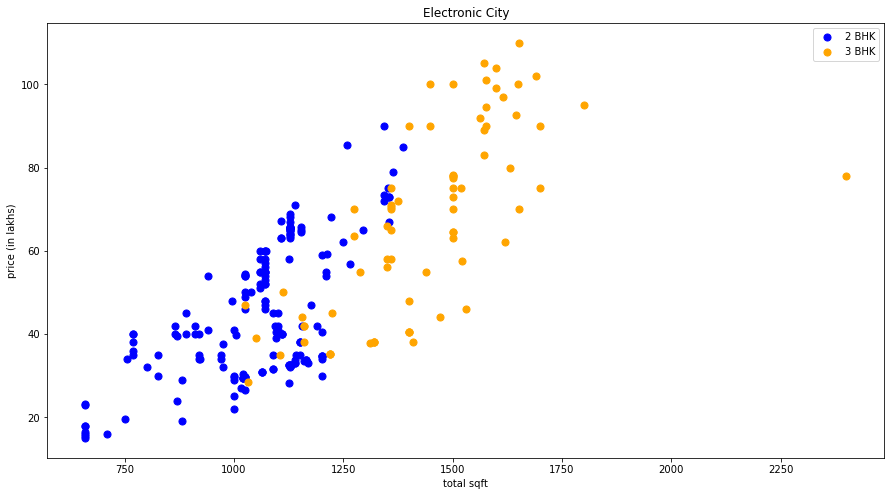

In [43]:
get_scatter_plot(houses, "Electronic City")

In [44]:
# Clearly, for same location, the price of 3BHK is less than 2BHK apartment with same square ft area
# We need to remove such values, by building a dictionary of stats per bhk
# example, remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, loc_df in df.groupby('location'):
        bhk_statistics = {}
        for bhk, bhk_df in loc_df.groupby('bhk'):
            bhk_statistics[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            
        for bhk, bhk_df in loc_df.groupby('bhk'):
            stats = bhk_statistics.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

houses = remove_bhk_outliers(houses)
print(houses.shape)

(7361, 9)


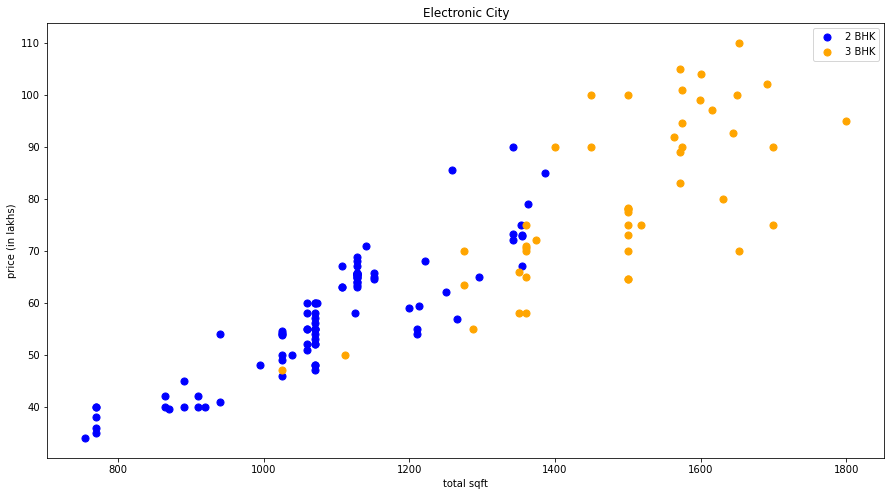

In [45]:
# Clearly, such outliers are removed
get_scatter_plot(houses, "Electronic City")

In [46]:
print(houses['total_sqft'].max())
print(houses['total_sqft'].min())

30000.0
300.0


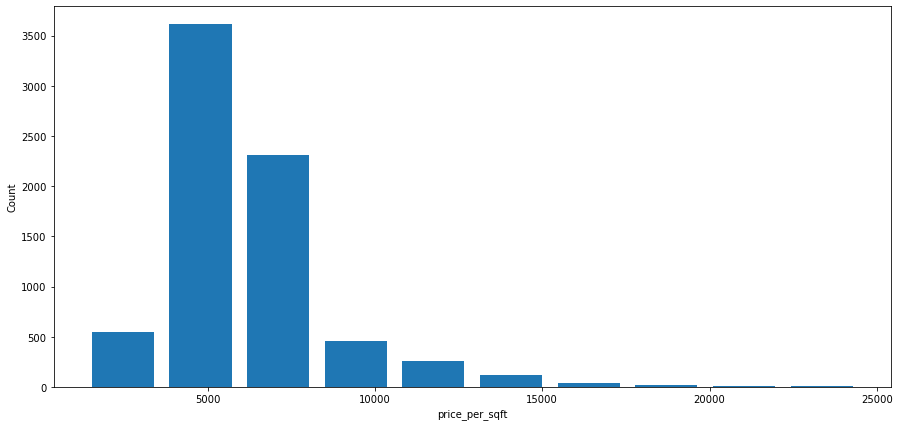

In [47]:
# visualise the count of 'price_per_sqft'
plt.figure(figsize=(15,7))
plt.hist(houses['price_per_sqft'], rwidth=0.8)
plt.ylabel('Count')
plt.xlabel('price_per_sqft')
plt.show()

In [48]:
# There are outliers in 'bathroom' column too
houses['bath'].value_counts()

2.00000     4198
3.00000     1765
1.00000      569
4.00000      498
5.00000      175
6.00000       80
2.69261       35
7.00000       16
8.00000       13
9.00000        7
12.00000       3
16.00000       1
13.00000       1
Name: bath, dtype: int64

In [49]:
# We will remove outliers where (no. of bathrooms) > (no. of bedrooms+2)
houses[houses['bath'] > houses['bhk']+2]

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1637,Built-up Area,Ready To Move,Chikkabanavar,2460.0,7.0,2.000000,80.0,4,3252.032520
5274,Built-up Area,Ready To Move,Nagasandra,7000.0,8.0,1.584376,450.0,4,6428.571429
6759,Super built-up Area,Ready To Move,Thanisandra,1806.0,6.0,2.000000,116.0,3,6423.034330
8468,Super built-up Area,Ready To Move,other,11338.0,9.0,1.000000,1000.0,6,8819.897689


In [50]:
houses = houses[houses['bath'] < houses['bhk']+2]
print(houses.shape)

(7282, 9)


In [51]:
houses['bath'].unique()

array([ 4.        ,  3.        ,  2.        ,  5.        ,  1.        ,
        6.        ,  8.        ,  2.69260965,  7.        ,  9.        ,
       16.        , 12.        , 13.        ])

In [52]:
# converting float values to int
houses['bath'] = houses['bath'].astype(int)

In [53]:
houses['bath'].unique()

array([ 4,  3,  2,  5,  1,  6,  8,  7,  9, 16, 12, 13])

In [54]:
# Let's examine the 'balcony' column
houses['balcony'].value_counts()

1.000000    2935
2.000000    2787
3.000000     796
0.000000     518
1.584376     246
Name: balcony, dtype: int64

In [55]:
houses['balcony'].unique()

array([1.        , 2.        , 3.        , 0.        , 1.58437574])

In [56]:
# converting float values to int
houses['balcony'] = houses['balcony'].astype(int)

In [57]:
houses['balcony'].unique()

array([1, 2, 3, 0])

In [58]:
# 'price_per_sqft' column was created only for outlier detection, so we can drop it now
houses = houses.drop(['price_per_sqft', 'availability'], axis='columns')
print(houses.shape)
houses.head(5)

(7282, 7)


,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4,1,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3,2,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2,3,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2,0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2,2,148.0,2


In [59]:
# Re-ordering the columns
houses = houses.reindex(['location', 'area_type', 'bhk', 'bath', 'balcony', 'total_sqft', 'price'], axis='columns')
print(houses.shape)
houses.head(5)

(7282, 7)


,location,area_type,bhk,bath,balcony,total_sqft,price
0,1st Block Jayanagar,Super built-up Area,4,4,1,2850.0,428.0
1,1st Block Jayanagar,Super built-up Area,3,3,2,1630.0,194.0
2,1st Block Jayanagar,Super built-up Area,3,2,3,1875.0,235.0
3,1st Block Jayanagar,Built-up Area,3,2,0,1200.0,130.0
4,1st Block Jayanagar,Super built-up Area,2,2,2,1235.0,148.0


### Exploratory Analysis

In [60]:
houses['area_type'].value_counts()

Super built-up  Area    5317
Built-up  Area          1320
Plot  Area               603
Carpet  Area              42
Name: area_type, dtype: int64

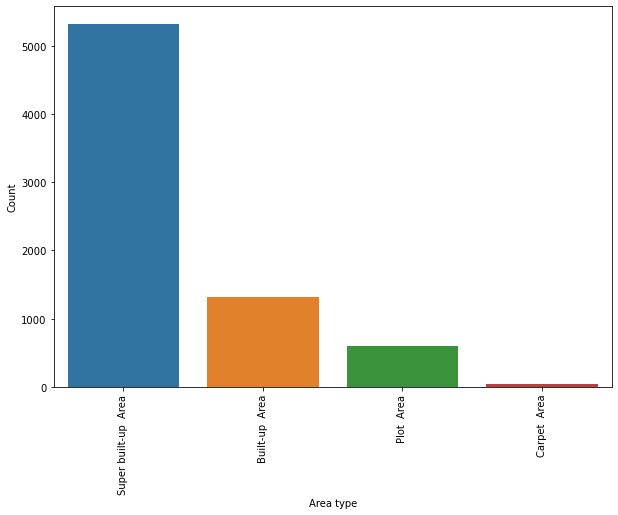

In [61]:
# visualise the count of the different area types
plt.figure(figsize=(10,7))
sns.countplot(x="area_type", data=houses)
plt.ylabel('Count')
plt.xlabel('Area type')
plt.xticks(rotation='vertical')
plt.show()

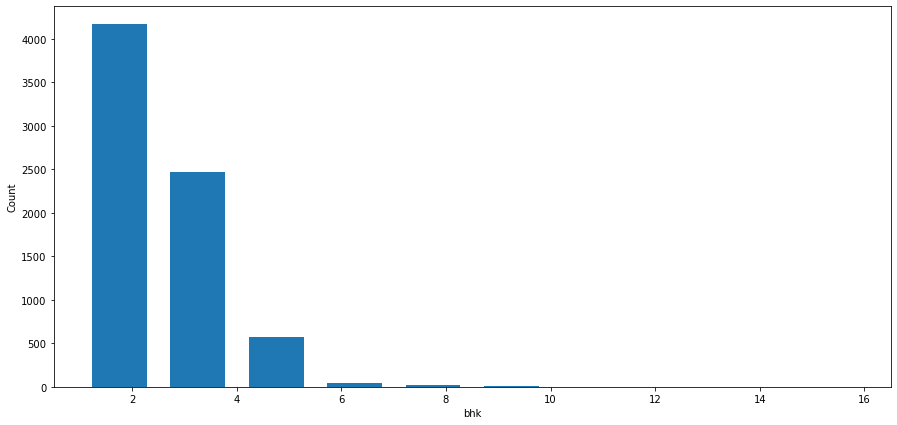

In [62]:
# Let's visualize the 'bhk' column
plt.figure(figsize=(15,7))
plt.hist(houses['bhk'], rwidth=0.7)
plt.xlabel("bhk")
plt.ylabel("Count")
plt.show()

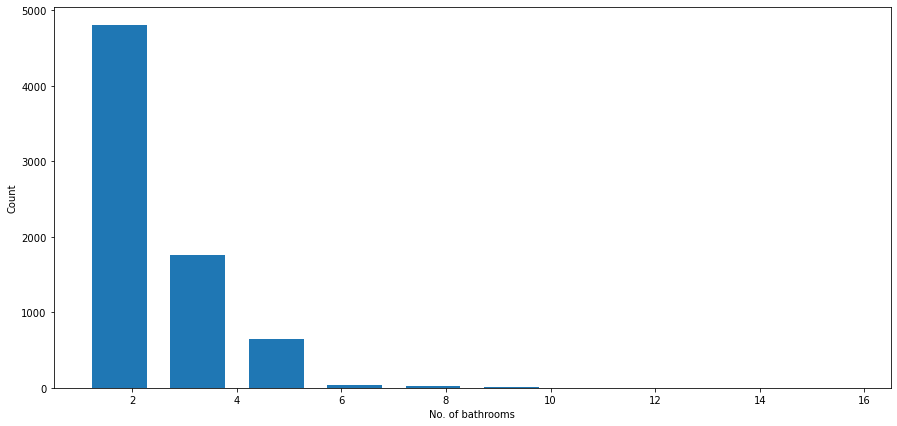

In [63]:
# Let's visualize the 'bath' column
plt.figure(figsize=(15,7))
plt.hist(houses['bath'], rwidth=0.7)
plt.xlabel("No. of bathrooms")
plt.ylabel("Count")
plt.show()

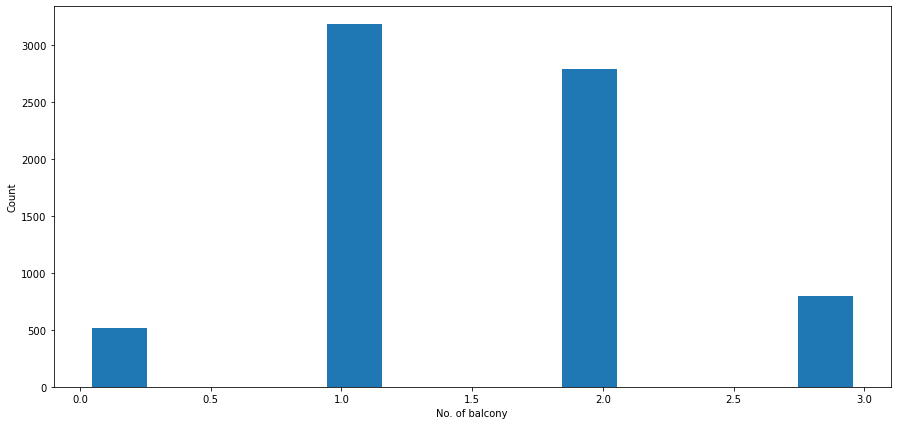

In [64]:
# Let's visualize the 'balcony' column
plt.figure(figsize=(15,7))
plt.hist(houses['balcony'], rwidth=0.7)
plt.xlabel("No. of balcony")
plt.ylabel("Count")
plt.show()

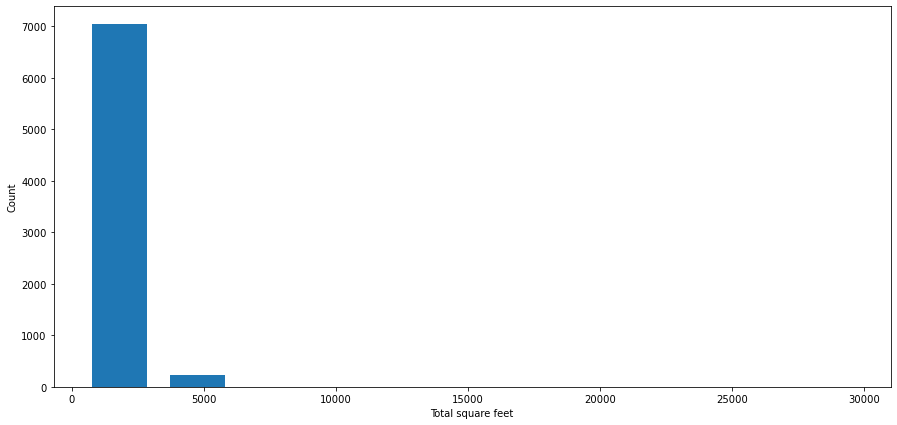

In [65]:
# Let's visualize the 'total_sqft' column
plt.figure(figsize=(15,7))
plt.hist(houses['total_sqft'], rwidth=0.7)
plt.xlabel("Total square feet")
plt.ylabel("Count")
plt.show()

#### Visualizing the 'target' variable

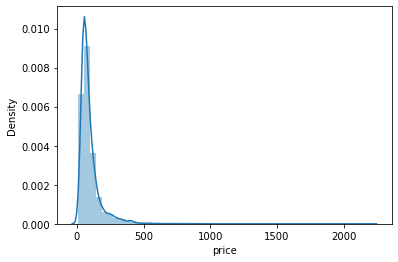

In [66]:
sns.distplot(houses['price'])
plt.show()

In [67]:
print(houses['price'].min())
print(houses['price'].max())

10.0
2200.0


##### Correlation matrix

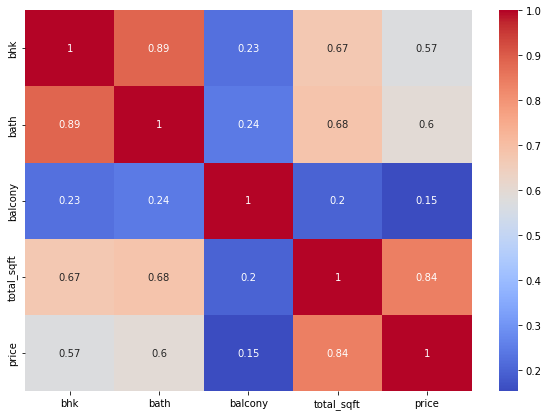

In [68]:
# Correlation among all the numeric variables
plt.figure(figsize=(10,7))
sns.heatmap(houses.corr(), annot=True, cmap = "coolwarm")
plt.show()

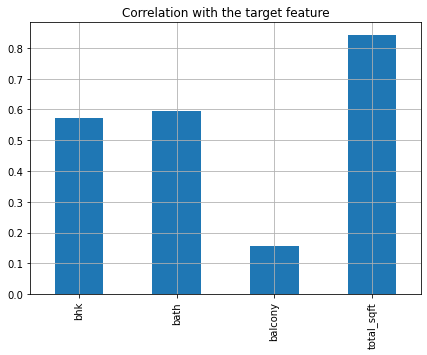

In [69]:
houses.drop('price', axis=1).corrwith(houses['price']).plot(kind='bar', grid=True, figsize=(7, 5), 
                                                            title="Correlation with the target feature")
plt.show()

### Building our model

In [70]:
# Define the 'features' and 'labels'
X = houses.drop('price', axis='columns')
y = houses['price']

In [71]:
# Define train : test dataset in 70 : 30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [72]:
X_train.head(5)

,location,area_type,bhk,bath,balcony,total_sqft
7400,Whitefield,Super built-up Area,1,1,0,709.0
1683,Choodasandra,Built-up Area,4,3,1,2429.0
1176,Bellandur,Super built-up Area,3,3,1,1535.0
504,Ardendale,Built-up Area,4,4,3,3198.0
4899,Mahadevpura,Super built-up Area,3,3,2,1505.0


### Linear Regression model

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [74]:
# Create Transformers
trf1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1])
], remainder='passthrough')

# Linear Regression model
from sklearn.linear_model import LinearRegression
trf2 = LinearRegression()

# Create Pipeline
model = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

In [75]:
# evaluating our model
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("Mean squared error: ", mean_squared_error(y_test, y_pred))

Mean absolute error:  17.823767838561054
Mean squared error:  1003.0759898371554


In [76]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)*100

# Create a dataframe to display accuracy
results_df = pd.DataFrame(data=[["Simple Linear Regression", score]],
                          columns=['Model', 'Accuracy(%)'])
results_df

,Model,Accuracy(%)
0,Simple Linear Regression,88.419113


### Random Forest Regressor model 

In [77]:
# Create Transformers
trf1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1])
], remainder='passthrough')

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
trf2 = RandomForestRegressor(random_state=0)

# Create Pipeline
rf = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])

# Train the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred1 = rf.predict(X_test)

In [78]:
# evaluating our regressor model
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean absolute error: ", mean_absolute_error(y_test, y_pred1))
print("Mean squared error: ", mean_squared_error(y_test, y_pred1))

Mean absolute error:  16.32306088316664
Mean squared error:  1229.4744505301658


In [79]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred1)*100

# Create a dataframe to display accuracy
results_df1 = pd.DataFrame(data=[["Random Forest Regressor", score]],
                          columns=['Model', 'Accuracy(%)'])
results_df1

,Model,Accuracy(%)
0,Random Forest Regressor,85.805258


In [80]:
results_df = results_df.append(results_df1, ignore_index=True)
results_df

,Model,Accuracy(%)
0,Simple Linear Regression,88.419113
1,Random Forest Regressor,85.805258


### XGBoost Regressor

In [81]:
# Create Transformers
trf1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1])
], remainder='passthrough')

# XGBoost Regressor
import xgboost as xgb
from xgboost import XGBRegressor
trf2 = XGBRegressor(max_depth=3)

# Create Pipeline
xgb_reg = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])

# Train the model on the training set
xgb_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred2 = xgb_reg.predict(X_test)

In [82]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred2)*100)

85.80106920194815


##### Hyperparameter tuning in XGBoost Regressor

In [83]:
# Create Transformers
trf1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1])
], remainder='passthrough')

# XGBoost Regressor with optimal hyperparameters
import xgboost as xgb
from xgboost import XGBRegressor
trf2 = XGBRegressor(gamma=1.5, 
                    learning_rate=0.1, 
                    max_depth=9, 
                    n_estimators=1000, 
                    subsample=1.0,
                    colsample_bylevel=1.0, 
                    colsample_bytree=1.0, 
                    min_child_weight=1.0)

# Create Pipeline
xgb = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])

# Train the model on the training set
xgb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred3 = xgb.predict(X_test)

In [84]:
print("Score: ", xgb.score(X_test, y_test))

Score:  0.8826151462729499


In [85]:
# evaluating our xgb regressor model
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean absolute error: ", mean_absolute_error(y_test, y_pred3))
print("Mean squared error: ", mean_squared_error(y_test, y_pred3))

Mean absolute error:  14.83670446932725
Mean squared error:  1016.7262993208554


In [86]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred3)*100

# Create a dataframe to display accuracy
results_df2 = pd.DataFrame(data=[["XGBoost Regressor", score]],
                          columns=['Model', 'Accuracy(%)'])
results_df2

,Model,Accuracy(%)
0,XGBoost Regressor,88.261515


In [87]:
results_df = results_df.append(results_df2, ignore_index=True)
results_df

,Model,Accuracy(%)
0,Simple Linear Regression,88.419113
1,Random Forest Regressor,85.805258
2,XGBoost Regressor,88.261515


In [88]:
# Clearly, Simple Linear Regressor gave the best score

### Making predictions

In [89]:
# loading the model we will use to make predictions
pred = model.predict(X_test)

In [90]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df

,Actual,Predicted
5932,50.0,49.473322
5394,80.0,65.148962
8528,52.0,73.074778
9698,135.0,103.949516
5402,77.0,65.148962
...,...,...
4896,54.0,52.818230
9271,62.0,65.815469
3327,53.7,48.179784
9618,365.0,228.596180


In [91]:
final_df = df['Predicted']
final_df = df.drop('Actual', axis=1)

In [92]:
X["price"] = final_df

In [93]:
export_csv = X.to_csv(r"C:\Users\Rajashri\Desktop\Resume\Resume Projects\Housing Prices Predictions\website\predictions(1).csv", 
                      index=None, header=True)
print("Successfully Exported!!")

Successfully Exported!!


### Dump our models into a pickle file

In [94]:
# dump the ML models into a 'pickle' file
import pickle

pickle.dump(houses, open(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Housing Prices Predictions\website\houses(1).pkl', 'wb'))
pickle.dump(model, open(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Housing Prices Predictions\website\model(1).pkl', 'wb'))